Resultado do Teste	Faixa			Quantidade	Percentual (%)
Acima da Média		> Média (15232.00)		29		52.73
Na Média		= Média (15232.00)		0		0.00
Abaixo da Média		< Média (15232.00)		26		47.27



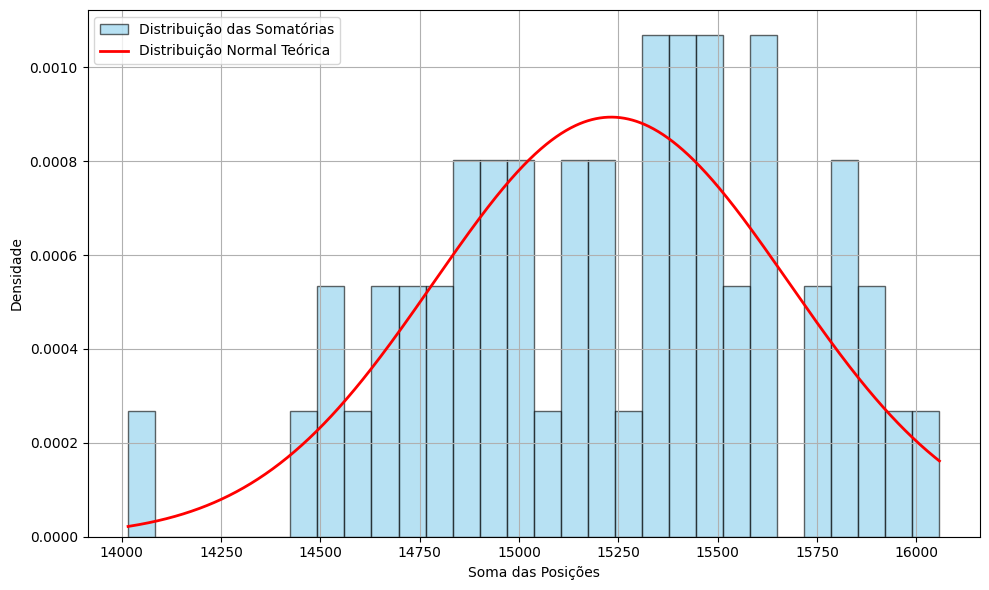

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import warnings

# Configuração
pd.options.display.float_format = '{:.4f}'.format
warnings.filterwarnings("ignore")

# Leitura do CSV
file_path = "/content/resultado_sorteios.csv"  # ajuste o caminho conforme necessário
df = pd.read_csv(file_path, sep="\t", engine="python")
df.columns = [f"col_{i}" for i in range(1, df.shape[1] + 1)]
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Seleção das colunas dos sorteios
sorteio_data = df_numeric.iloc[:, 2:]
somas = sorteio_data.sum(axis=1, skipna=True)

# Estatísticas globais
media = np.mean(somas)
desvio = np.std(somas, ddof=1)

# Classificação
acima = (somas > media).sum()
igual = (somas == media).sum()
abaixo = (somas < media).sum()
total = len(somas)

# Exibição da análise com valor da média nas faixas
print("Resultado do Teste\tFaixa\t\t\tQuantidade\tPercentual (%)")
print(f"Acima da Média\t\t> Média ({media:.2f})\t\t{acima}\t\t{(acima / total) * 100:.2f}")
print(f"Na Média\t\t= Média ({media:.2f})\t\t{igual}\t\t{(igual / total) * 100:.2f}")
print(f"Abaixo da Média\t\t< Média ({media:.2f})\t\t{abaixo}\t\t{(abaixo / total) * 100:.2f}")
print()

# Monta DataFrame de saída
resultado_df = pd.DataFrame({
    'candidato': [f"candidato {i+1}" for i in range(total)],
    'media': [media] * total,
    'desvio_padrao': [desvio] * total,
    'soma_posicoes': somas
})

# Salva o CSV
output_path = "/content/resultado_teste_soma_colocacoes.csv"
resultado_df.to_csv(output_path, index=False)

# Gráfico
plt.figure(figsize=(10, 6))
count, bins, ignored = plt.hist(somas, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black', label='Distribuição das Somatórias')

x = np.linspace(min(bins), max(bins), 1000)
plt.plot(x, norm.pdf(x, media, desvio), 'r-', lw=2, label='Distribuição Normal Teórica')

plt.xlabel("Soma das Posições")
plt.ylabel("Densidade")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
